In [88]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
print("Setup Complete")

Setup Complete


In [89]:
rng = np.random.RandomState(0)
print("Prayer to RNGesus Sent")

Prayer to RNGesus Sent


# Generators for Classification and Clustering

In [173]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

# for plotting in 2D space
n_features = 2
columns = ['x', 'y']

# blobs
blobs_data, blobs_class = make_blobs(
    n_samples=1000, random_state=rng,
    n_features=n_features
)
blobs_df = pd.DataFrame(blobs_data, columns=columns)
blobs_df['class'] = blobs_class

# moons
moons_data, moons_class = make_moons(
    n_samples=1000, random_state=rng,
    noise=0.1
)
moons_df = pd.DataFrame(moons_data, columns=columns)
moons_df['class'] = moons_class

# circles
circles_data, circles_class = make_circles(
    n_samples=1000, random_state=rng,
    noise=0.1, factor=0.5
)
circles_df = pd.DataFrame(circles_data, columns=columns)
circles_df['class'] = circles_class

# classification problem
clf_data, clf_class = make_classification(
    n_samples=1000, random_state=rng,
    n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, n_clusters_per_class=1, flip_y=0.01
)
clf_df = pd.DataFrame(clf_data, columns=columns)
clf_df['class'] = clf_class

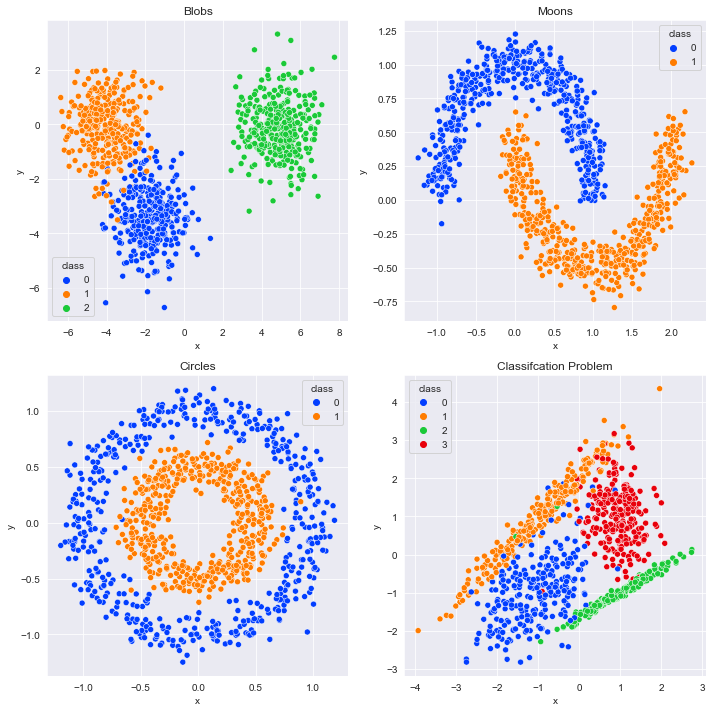

In [174]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(data=blobs_df, x='x', y='y', hue='class', palette='bright', ax=axes[0,0])
axes[0,0].set_title('Blobs')

sns.scatterplot(data=moons_df, x='x', y='y', hue='class', palette='bright', ax=axes[0,1])
axes[0,1].set_title('Moons')

sns.scatterplot(data=circles_df, x='x', y='y', hue='class', palette='bright', ax=axes[1,0])
axes[1,0].set_title('Circles')

sns.scatterplot(data=clf_df, x='x', y='y', hue='class', palette='bright', ax=axes[1,1])
axes[1,1].set_title('Classifcation Problem')

fig.tight_layout()
plt.show()